In [2]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [14]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [15]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev = 0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))


W2 = tf.Variable(tf.random_normal([256, 256], stddev = 0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev = 0.01))
model = tf.matmul(L2, W3)

In [16]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels= Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [17]:
#세션 시작하기. 

init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

### Mini Batch Learning

In [18]:
batch_size = 100
#train set 개수를 배치 사이즈로 나누면? -> 총 미니배치가 몇개인지가 나오는 것. 
total_batch = int(mnist.train.num_examples/batch_size)

In [19]:
mnist.train.num_examples

55000

In [20]:
for epoch in range(15):
    total_cost = 0;
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs, Y: batch_ys})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch +1), 'Avg. cost = ', '{:3f}'.format(total_cost/ total_batch)) 

Epoch: 0001 Avg. cost =  0.408608
Epoch: 0002 Avg. cost =  0.151119
Epoch: 0003 Avg. cost =  0.098660
Epoch: 0004 Avg. cost =  0.069515
Epoch: 0005 Avg. cost =  0.052980
Epoch: 0006 Avg. cost =  0.040317
Epoch: 0007 Avg. cost =  0.030680
Epoch: 0008 Avg. cost =  0.027134
Epoch: 0009 Avg. cost =  0.020600
Epoch: 0010 Avg. cost =  0.015871
Epoch: 0011 Avg. cost =  0.018105
Epoch: 0012 Avg. cost =  0.014511
Epoch: 0013 Avg. cost =  0.011792
Epoch: 0014 Avg. cost =  0.012330
Epoch: 0015 Avg. cost =  0.011960


In [21]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

In [22]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [23]:
print('정확도:', sess.run(accuracy, feed_dict = {X:mnist.test.images, Y: mnist.test.labels}))

정확도: 0.9782


## DropOut

In [44]:

keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev = 0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev = 0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev = 0.01))
model = tf.matmul(L2, W3)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels= Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


In [45]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

In [46]:
batch_size = 100
#train set 개수를 배치 사이즈로 나누면? -> 총 미니배치가 몇개인지가 나오는 것. 
total_batch = int(mnist.train.num_examples/batch_size)

In [48]:
for epoch in range(15):
    total_cost = 0;
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)


        _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.8})

        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch +1), 'Avg. cost = ', '{:3f}'.format(total_cost/ total_batch)) 

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict = {X:mnist.test.images, Y: mnist.test.labels, keep_prob: 1 }))   

Epoch: 0001 Avg. cost =  0.088156
Epoch: 0002 Avg. cost =  0.069538
Epoch: 0003 Avg. cost =  0.061030
Epoch: 0004 Avg. cost =  0.051505
Epoch: 0005 Avg. cost =  0.046088
Epoch: 0006 Avg. cost =  0.041008
Epoch: 0007 Avg. cost =  0.038007
Epoch: 0008 Avg. cost =  0.032282
Epoch: 0009 Avg. cost =  0.031856
Epoch: 0010 Avg. cost =  0.029446
Epoch: 0011 Avg. cost =  0.028276
Epoch: 0012 Avg. cost =  0.027105
Epoch: 0013 Avg. cost =  0.023464
Epoch: 0014 Avg. cost =  0.021149
Epoch: 0015 Avg. cost =  0.021220
정확도: 0.982


## Matplotlib Python

In [53]:
import matplotlib.pyplot as plt
import numpy as np
labels = sess.run(model, 
                 feed_dict = {X:mnist.test.images, Y:mnist.test.labels, keep_prob:1})

In [54]:
fig = plt.figure()

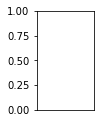

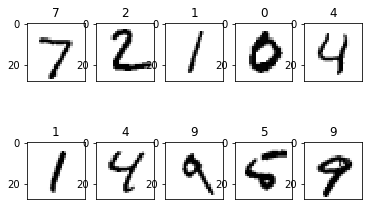

In [56]:
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_xticks([])
    subplot.set_title('%d' %np.argmax(labels[i]))
    
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()